# Stacking regression example

**Example using the stacking linear regression function in the stepAIC module**

The **stacking** function in the stepAIC module provides output of regression models and summary statistics using the sklearn StackingRegressor function for ensemble modeling with any combination of sklearn base regressors which can be turned 'on' or 'off'.

The base regressors can be changed using the following are optional keyword arguments:

- lasso= 'on' (default) or 'off'        uses LassoCV
- ridge= 'on' (default) or 'off'        uses RidgeCV
- elastic= 'on' (default) or 'off'      uses ElasticNetCV
- sgd= 'on' (default) or 'off'          uses SGDRegressor
- knr= 'on' (default) or 'off'          uses KNeighborsRegressor
- svr= 'on' (default) or 'off'          uses SVR(kernel='rbf')
- gbr= 'on' (default) or 'off'          uses GradientBoostingRegressor
- tree= 'on' (default) or 'off'         uses DecisionTreeRegressor
- forest= 'on' (default) or 'off'       uses RandomForestRegressor
- mlp= 'on' or 'off' (default)          uses MLPRegressor

The meta-model may be specifed using the optional keyword argument meta:

- meta= 'linear', 'lasso', 'ridge' (default), or 'elastic' 

The **stacking** function standardizes the X input by default. 

This example shows how to test the model with independent training and testing data subsets before fitting the final model with all of the data.

#### Example data set

This example uses the diabetes data described in the following tutorial by sklearn:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py

### Read X and y from the sklearn diabetes data set

In [1]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True, as_frame=True)

### Split X and y into training and testing sets

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Fit the model to a subset of the data for training

Fitting StackingRegressor models, please wait ...


StackingRegressor statistics of fitted ensemble model in model_outputs['stats']:


| Statistic          |   StackingRegressor |
|:-------------------|--------------------:|
| r-squared          |         0.628048    |
| adjusted r-squared |         0.617172    |
| n_samples          |       353           |
| df residuals       |       343           |
| df model           |         9           |
| F-statistic        |        64.3512      |
| Prob (F-statistic) |         1.11022e-16 |
| RMSE               |        47.5408      |
| Log-Likelihood     |     -1864.03        |
| AIC                |      3748.05        |
| BIC                |      3786.72        |


Meta-model coefficients of base_regressors in model_outputs['meta_params']:


- positive intercept suggests base models under-predict target
- negative intercept suggests base models over-predict target
- positive coefficients have high importance
- coefficients near zero have 

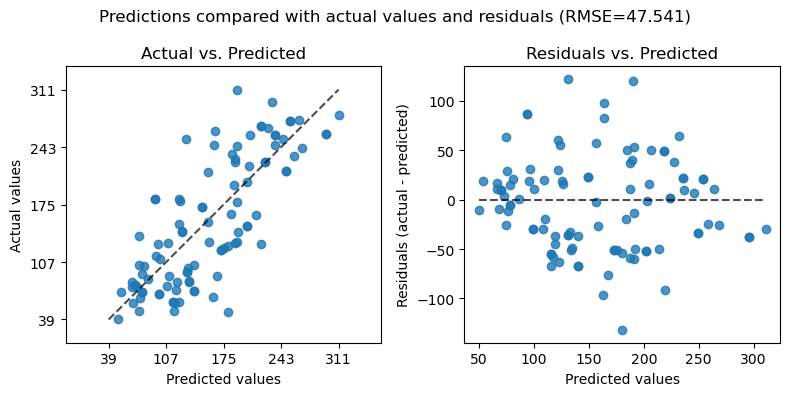

In [3]:
# Use the stacking function in the stepAIC module
from stepAIC import stacking
model, output = stacking(X_train, y_train)

### Check the skill of the trained model using the testing data subset

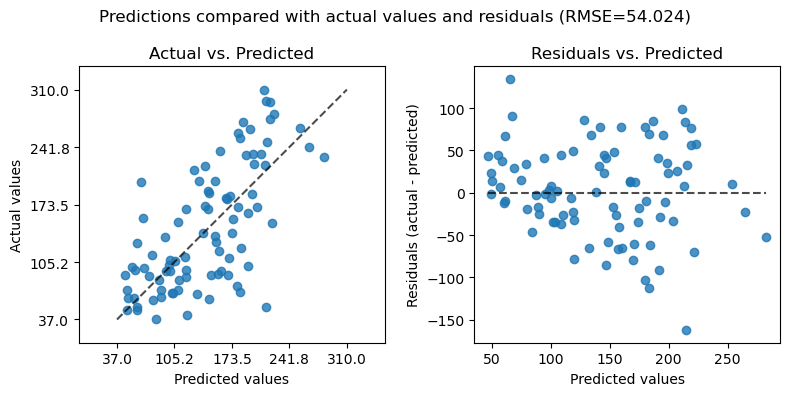

In [4]:
from stepAIC import plot_predictions_from_test
fig = plot_predictions_from_test(model, X_test, y_test, scaler=output['scaler'])
fig.savefig("StackingRegressor_predictions_test.png", dpi=300)

### Final fit of the model using all X and y data

Fitting StackingRegressor models, please wait ...


StackingRegressor statistics of fitted ensemble model in model_outputs['stats']:


| Statistic          |   StackingRegressor |
|:-------------------|--------------------:|
| r-squared          |         0.603124    |
| adjusted r-squared |         0.593916    |
| n_samples          |       442           |
| df residuals       |       432           |
| df model           |         9           |
| F-statistic        |        72.9446      |
| Prob (F-statistic) |         1.11022e-16 |
| RMSE               |        48.5121      |
| Log-Likelihood     |     -2342.93        |
| AIC                |      4705.87        |
| BIC                |      4746.78        |


Meta-model coefficients of base_regressors in model_outputs['meta_params']:


- positive intercept suggests base models under-predict target
- negative intercept suggests base models over-predict target
- positive coefficients have high importance
- coefficients near zero have 

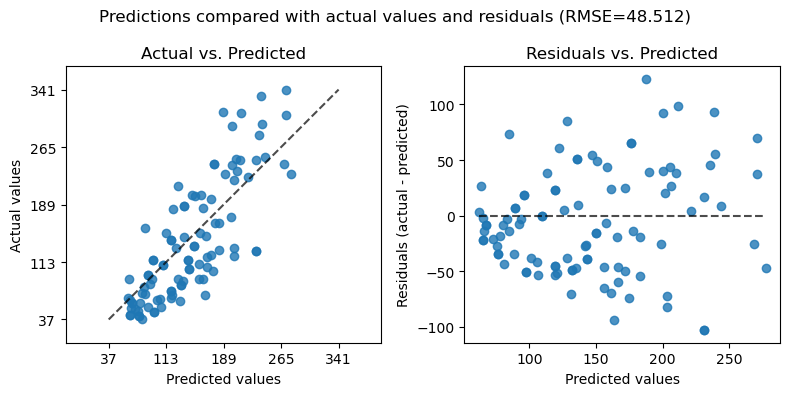

In [5]:
from stepAIC import stacking
final_model, final_output = stacking(X, y)